In [27]:
# Load modules

import numpy as np
import matplotlib.pyplot as plt
import datetime

In [28]:
# Define functions

def cartesian_to_spherical(coords):   
    r = np.sqrt(coords[:,0]**2 + coords[:,1]**2 + coords[:,2]**2)
    phi = np.sign(coords[:,0]) * np.arccos(coords[:,1] / (np.sqrt(coords[:,0]**2 + coords[:,1]**2)))
    # theta = np.nan_to_num(x=theta)    - can use this for nan error if necessary
    theta = np.arccos(coords[:,2]/r)
    return np.array([r, theta, phi]).transpose()

def data_processing(data_path):
    # juice to callisto
    juice_wrt_callisto = np.loadtxt(data_path, delimiter=",", unpack=True)
    juice_wrt_callisto = juice_wrt_callisto.transpose()
    Xjc, Yjc, Zjc, vxjc, vyjc, vzjc, t = juice_wrt_callisto

    # convert positions to m
    juice_wrt_callisto_cart = 1e3 * np.array([Xjc, Yjc, Zjc]).transpose()

    juice_wrt_callisto_spher = cartesian_to_spherical(juice_wrt_callisto_cart)

    return [t, juice_wrt_callisto_cart, juice_wrt_callisto_spher]

def CA_info(orbit):
    min_index = np.argmin(orbit.transpose()[4])
    return orbit[min_index,:]

In [29]:
### Load in data from SPICE kernels, data loaded in has units km and km/s
# data paths
data_paths = []
data_path = "./spice_data/juice_wrt_callisto_C"

for i in range(1, 22):
    data_paths.append(data_path + str(i) + ".csv")

print(data_paths)

['./spice_data/juice_wrt_callisto_C1.csv', './spice_data/juice_wrt_callisto_C2.csv', './spice_data/juice_wrt_callisto_C3.csv', './spice_data/juice_wrt_callisto_C4.csv', './spice_data/juice_wrt_callisto_C5.csv', './spice_data/juice_wrt_callisto_C6.csv', './spice_data/juice_wrt_callisto_C7.csv', './spice_data/juice_wrt_callisto_C8.csv', './spice_data/juice_wrt_callisto_C9.csv', './spice_data/juice_wrt_callisto_C10.csv', './spice_data/juice_wrt_callisto_C11.csv', './spice_data/juice_wrt_callisto_C12.csv', './spice_data/juice_wrt_callisto_C13.csv', './spice_data/juice_wrt_callisto_C14.csv', './spice_data/juice_wrt_callisto_C15.csv', './spice_data/juice_wrt_callisto_C16.csv', './spice_data/juice_wrt_callisto_C17.csv', './spice_data/juice_wrt_callisto_C18.csv', './spice_data/juice_wrt_callisto_C19.csv', './spice_data/juice_wrt_callisto_C20.csv', './spice_data/juice_wrt_callisto_C21.csv']


In [30]:
#orbit1 = data_processing('./spice_data/juice_wrt_callisto_C1.csv')
#orbit1 =  np.asarray(orbit1)
#print(orbit1)

In [31]:
orbits_all = {}

for i in range(len(data_paths)):
    t, cart, spher = data_processing(data_paths[i])
    z = np.c_[t, cart]
    z = np.c_[z, spher]
    orbits_all['orbit%s' % (i+1)] = z

In [32]:
i = 1
CA_times_utc = []
CA_times_utc_min12hr = []
for orbit, vector in orbits_all.items():
    CA_info_vector = CA_info(vector)
    globals()['CA_orbit%s' % (i)] = CA_info_vector
    CA_time_utc = datetime.datetime(2000, 1, 1, 12, 0, 0) + datetime.timedelta(seconds=CA_info_vector[0])
    CA_time_utc_min12hr = CA_time_utc + datetime.timedelta(hours=-12)
    CA_times_utc.append(CA_time_utc)
    CA_times_utc_min12hr.append(CA_time_utc_min12hr)

    i += 1

for times in CA_times_utc_min12hr:
    print(times)

2032-06-20 12:39:18.368790
2032-07-28 13:51:18.366700
2032-08-14 06:15:18.365900
2032-09-10 07:26:18.364980
2032-09-27 00:00:18.364720
2032-10-13 16:29:18.364720
2032-10-30 08:54:18.365000
2032-11-16 01:17:18.365530
2032-12-02 17:37:18.366260
2033-02-24 04:09:18.370610
2033-03-12 20:32:18.371080
2033-05-10 04:10:18.370690
2033-06-04 06:39:18.369650
2033-06-20 23:02:18.368780
2033-07-07 15:24:18.367850
2033-07-24 07:47:18.366930
2033-08-10 00:15:18.366110
2033-11-01 11:01:18.365050
2034-02-14 12:09:18.370210
2034-05-01 10:26:18.370950
2034-06-23 17:15:18.368650


719
5968457.500261772
63158.36879003048
2032-06-21 00:39:18.368790


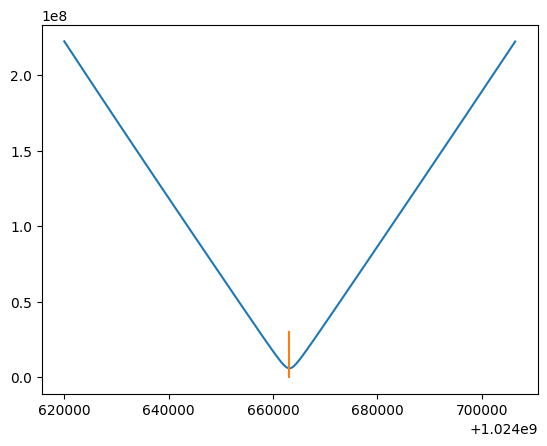

In [36]:
orbit1 = orbits_all['orbit1']
orbit1 = orbit1.transpose()
plt.plot(orbit1[0], orbit1[4])
minarg = np.argmin(orbit1[4])
print(minarg)
mintime = orbit1[0, minarg]
CA_i = orbit1.transpose()[minarg,:]
print(CA_i[4])
print(mintime-1.0246e9)
CA_time_utc = datetime.datetime(2000, 1, 1, 12, 0, 0) + datetime.timedelta(seconds=mintime)
CA_time_utc_min12hr = CA_time_utc + datetime.timedelta(hours=-12)
print(CA_time_utc)
plt.plot([mintime,mintime], [0,3e7])
